In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/simu6a_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [3]:
df_study

,index,study_itemno1,study_itemno2,study_item1,study_item2,session
0,0,716,141,HOOP,BLUEJAY,0
1,1,1261,862,SEAGULL,MAN,0
2,2,1067,1402,PIKE,SUIT,0
3,3,146,707,BOLT,HIGHWAY,0
4,4,155,1140,BOULDER,PUDDLE,0
...,...,...,...,...,...,...
71995,35995,397,606,CRAB,FRIEND,11999
71996,35996,829,582,LIPSTICK,FLORIDA,11999
71997,35997,1268,394,SENATOR,COWARD,11999
71998,35998,1113,965,POSTAGE,NUT,11999


In [4]:
df_test

,index,test_itemno,test_item,correct_ans,lag,session,order
0,0,716,HOOP,141,5,0,1
1,1,736,INDIAN,1342,5,1,1
2,2,1217,RUM,318,1,2,1
3,3,1119,PREACHER,754,1,3,1
4,4,13,AIRPORT,327,0,4,1
...,...,...,...,...,...,...,...
11995,5995,265,CEILING,767,5,11995,2
11996,5996,602,FRECKLE,542,0,11996,2
11997,5997,732,ICING,1193,2,11997,2
11998,5998,1569,VINEGAR,976,0,11998,2


### Run CMR-IA

In [5]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.45,
    beta_rec_post = 0.5,
    gamma_fc = 0.7,
    gamma_cf = 0.5,
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0.08,
    lamb = 0.05,
    eta = 0.02,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 10,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.45,
 'beta_rec_new': 0.5,
 'beta_rec_post': 0.5,
 'beta_distract': None,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.8,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 10,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'gamma_fc': 0.7,
 'gamma_cf': 0.5}

In [7]:
df_simu, f_in = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR Time: 107.94544386863708


,session,test_itemno,s_resp,s_rt
0,0,716,141.0,1560.0
1,1,736,1454.0,2380.0
2,2,1217,318.0,1940.0
3,3,1119,754.0,1680.0
4,4,13,327.0,1730.0
...,...,...,...,...
11995,11995,265,1009.0,2070.0
11996,11996,602,1084.0,1940.0
11997,11997,732,94.0,2330.0
11998,11998,1569,976.0,1420.0


In [8]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,session,test_itemno,s_resp,s_rt,index,test_item,correct_ans,lag,order,correct
0,0,716,141.0,1560.0,0,HOOP,141,5,1,True
1,1,736,1454.0,2380.0,1,INDIAN,1342,5,1,False
2,2,1217,318.0,1940.0,2,RUM,318,1,1,True
3,3,1119,754.0,1680.0,3,PREACHER,754,1,1,True
4,4,13,327.0,1730.0,4,AIRPORT,327,0,1,True
...,...,...,...,...,...,...,...,...,...,...
11995,11995,265,1009.0,2070.0,5995,CEILING,767,5,2,False
11996,11996,602,1084.0,1940.0,5996,FRECKLE,542,0,2,False
11997,11997,732,94.0,2330.0,5997,ICING,1193,2,2,False
11998,11998,1569,976.0,1420.0,5998,VINEGAR,976,0,2,True


In [9]:
# f_in

In [10]:
sessions = df_simu.session.to_numpy()
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)
    testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
    corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
    df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
    df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
df_simu

,session,test_itemno,s_resp,s_rt,index,test_item,correct_ans,lag,order,correct,corr_fin,omean_fin,omax_fin
0,0,716,141.0,1560.0,0,HOOP,141,5,1,True,0.557839,0.451265,0.584270
1,1,736,1454.0,2380.0,1,INDIAN,1342,5,1,False,0.541616,0.438663,0.565431
2,2,1217,318.0,1940.0,2,RUM,318,1,1,True,0.682296,0.413085,0.600074
3,3,1119,754.0,1680.0,3,PREACHER,754,1,1,True,0.679202,0.416056,0.604871
4,4,13,327.0,1730.0,4,AIRPORT,327,0,1,True,0.739596,0.381068,0.559108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,265,1009.0,2070.0,5995,CEILING,767,5,2,False,0.532845,0.435925,0.579962
11996,11996,602,1084.0,1940.0,5996,FRECKLE,542,0,2,False,0.752240,0.377874,0.559028
11997,11997,732,94.0,2330.0,5997,ICING,1193,2,2,False,0.631185,0.447006,0.607506
11998,11998,1569,976.0,1420.0,5998,VINEGAR,976,0,2,True,0.762622,0.391118,0.578304


In [11]:
df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

/home1/beigejin/.conda/envs/jinbeige/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,lag,corr_fin,omean_fin,omax_fin,dif
0,0,0.735650,0.378369,0.557309,0.178342
1,1,0.685524,0.418365,0.612869,0.072655
2,2,0.636069,0.446837,0.599236,0.036833
3,3,0.589161,0.462052,0.588377,0.000784
4,4,0.551180,0.461033,0.577771,-0.026592
5,5,0.536832,0.435708,0.567686,-0.030854


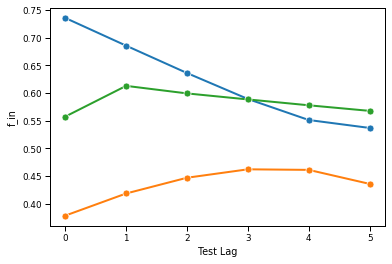

In [12]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

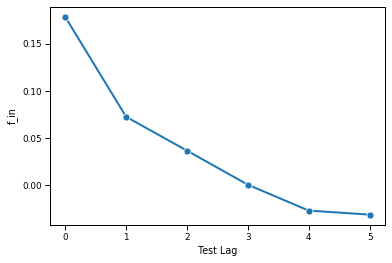

In [13]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

### PLOT

In [14]:
df_laggp = df_simu.groupby(['lag','order']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,order,corr_rate
0,0,1,0.823062
1,0,2,0.833002
2,1,1,0.543500
3,1,2,0.540567
4,2,1,0.374000
5,2,2,0.343000
6,3,1,0.265048
7,3,2,0.253432
8,4,1,0.200985
9,4,2,0.200985


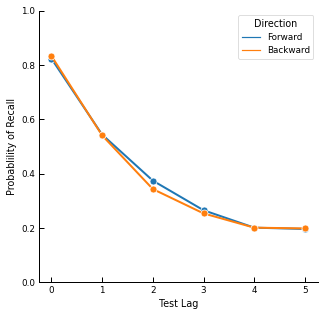

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 7, hue='order',palette='tab10')
plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
L = plt.legend(title='Direction',loc='upper right')
L.get_texts()[0].set_text('Forward')
L.get_texts()[1].set_text('Backward')
# plt.savefig('fig/simu6a_recall.pdf')
plt.show()